'''<br>
@Author: Rahul <br>
@Date: 2024-11-11<br>
@Last Modified by: Rahul <br>
@Last Modified time: 2024-11-11<br>
@Title: Python program for Simple Linear Regression<br>
'''

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [253]:
# Step 2: Load the train and test datasets
train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv')  

In [254]:
print(train_data.isnull().sum())
test_data.info()

x    0
y    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [255]:
# Step 3: Drop rows with NaN values in 'y' in both datasets (if any)
train_data = train_data.dropna(subset=['y'])
test_data = test_data.dropna(subset=['y'])

In [256]:
# Step 4: Split the datasets into features (X) and target (y)
X_train = train_data[['x']]  
y_train = train_data['y']     
X_test = test_data[['x']]     
y_test = test_data['y'] 

In [257]:
# Step 5: Scale the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [259]:
# Step 7: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [260]:
# Step 8: Evaluate the model
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("R^2 score:", r2_score(y_test, y_test_pred))

Training MSE: 7.867752733487687
Test MSE: 9.43292219203933
R^2 score: 0.9888014444327563


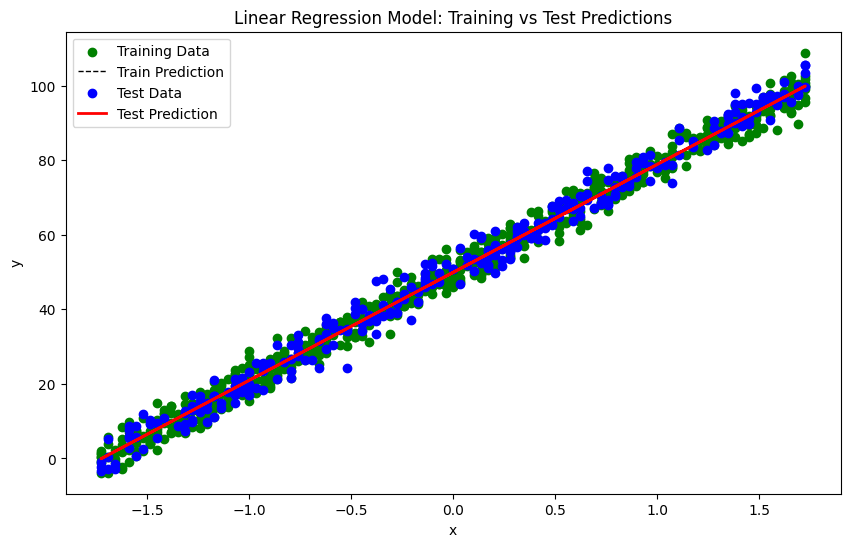

In [261]:

# Step 9: Plot the model's predictions and differentiate training and test data
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.plot(X_train, y_train_pred, color='black', linestyle='--', linewidth=1, label='Train Prediction')

# Plot test data
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Test Prediction')

# Labels and legend
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()
plt.title('Linear Regression Model: Training vs Test Predictions')
plt.show()


Build a predictive linear regression model for given dataset, given humidity
predict apparent temperature

Reading the File

In [262]:
data = pd.read_csv('weatherHistory.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Handling the Missing data 

In [263]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


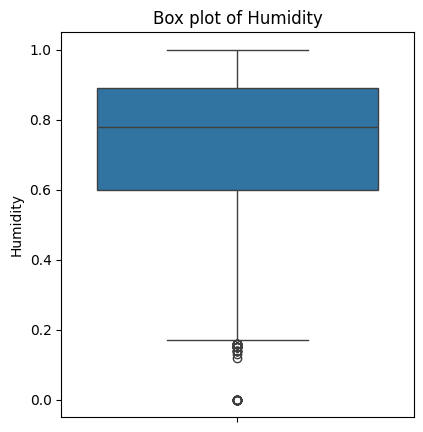

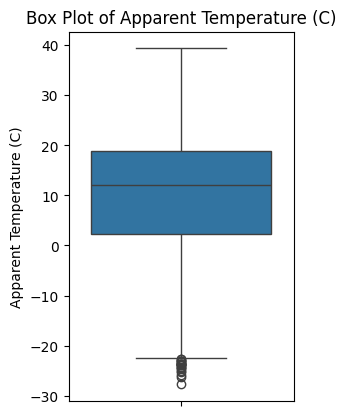

In [264]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['Humidity'])
plt.title("Box plot of Humidity")

plt.show()

plt.subplot(1,2,1)
sns.boxplot(y=data['Apparent Temperature (C)'])
plt.title('Box Plot of Apparent Temperature (C)')

plt.show()

Handling the Outlier (Removing the Outlier)

In [265]:
q1 = data['Humidity'].quantile(0.25)
q3 = data['Humidity'].quantile(0.75)

q1,q3

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
higher_bound = q3 + 1.5 * IQR
lower_bound,higher_bound

cleaned_data = data[(data['Humidity']>=lower_bound) & (data['Humidity']<=higher_bound)]

In [266]:
q1 = data['Apparent Temperature (C)'].quantile(0.25)
q3 = data['Apparent Temperature (C)'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR 
higher_bound = q3 + 1.5 * IQR 

cleaned_data = cleaned_data[(cleaned_data['Apparent Temperature (C)']>=lower_bound) & (cleaned_data['Apparent Temperature (C)']<=higher_bound)]

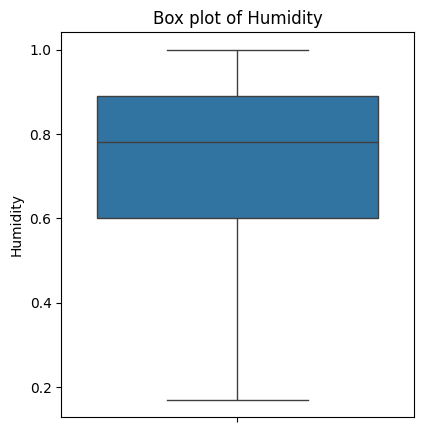

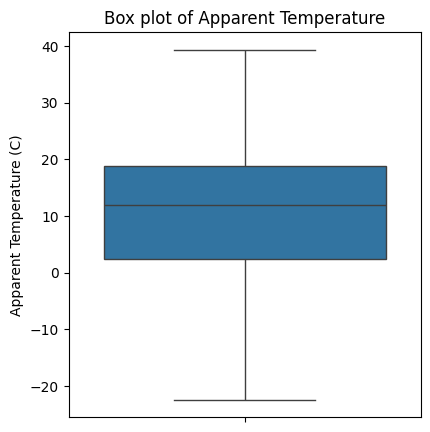

In [270]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y = cleaned_data['Humidity'])
plt.title("Box plot of Humidity")

plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=cleaned_data['Apparent Temperature (C)'])
plt.title("Box plot of Apparent Temperature")

plt.show()

Spliting the Data

In [ ]:
X = cleaned_data[['Humidity']] #Feature
Y = cleaned_data['Apparent Temperature (C)'] #Target

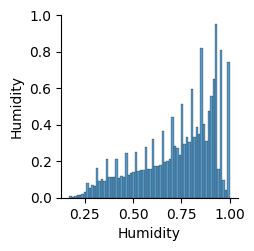

In [ ]:
sns.pairplot(X)

In [ ]:
subset = cleaned_data[['Humidity','Apparent Temperature (C)']]
corelation_matrix = subset.corr()
corelation_matrix

,Humidity,Apparent Temperature (C)
Humidity,1.000000,-0.606568
Apparent Temperature (C),-0.606568,1.000000


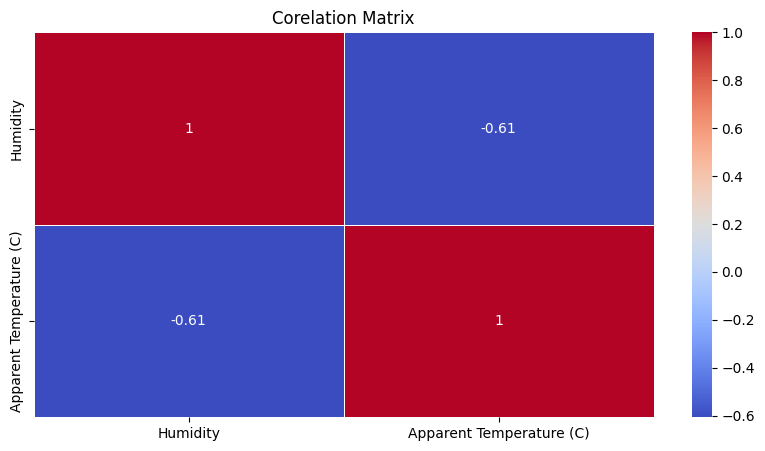

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corelation_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corelation Matrix')
plt.show()

In [ ]:
x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(X,Y,test_size=0.2,random_state=42)

x_train_data = scaler.fit_transform(x_train_data)

x_test_data = scaler.transform(x_test_data)

print("X Train",x_train_data.size)
print("Y Train",y_train_data.size)

X Train 77111
Y Train 77111


In [ ]:
model = LinearRegression()
model.fit(x_train_data,y_train_data)

LinearRegression()

In [ ]:
y_test_prediction = model.predict(x_test_data)
y_test_prediction.shape

(19278,)

In [ ]:
mse = mean_squared_error(y_test_data,y_test_prediction)
rsquare_score = r2_score(y_test_data,y_test_prediction)

print(mse)
print(rsquare_score)

72.06911000865391
0.3674055968652362


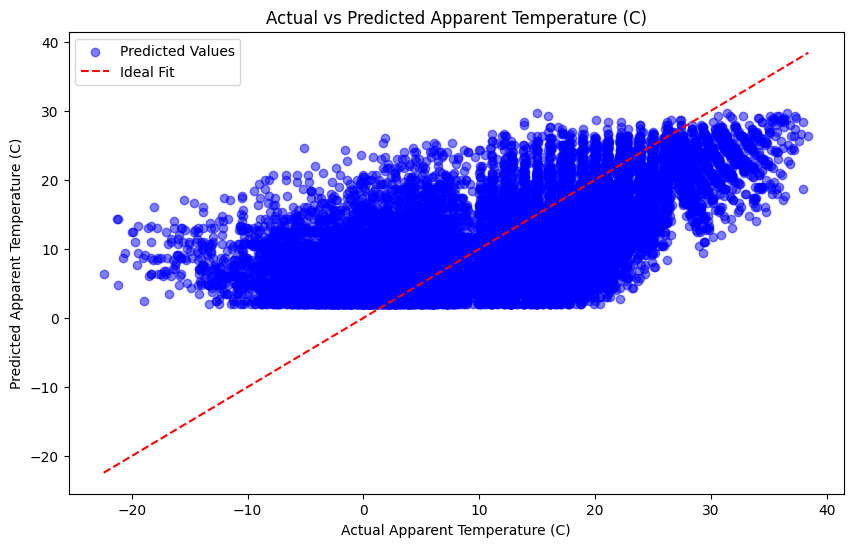

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_data, y_test_prediction, color='blue', alpha=0.5, label="Predicted Values")
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.title('Actual vs Predicted Apparent Temperature (C)')

# Plot the ideal fit line (from minimum to maximum of actual values)
plt.plot([y_test_data.min(), y_test_data.max()], [y_test_data.min(), y_test_data.max()], color='red', linestyle='--', label='Ideal Fit')

# Show legend
plt.legend()
plt.show()

